# Importing neccessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# Loading Datasets 

In [2]:
import pandas as pd
heart_dataset = pd.read_csv(r"C:\Users\nehaa\Downloads\heart_disease_data.csv")


In [7]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:

heart_dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
heart_dataset.shape

(303, 14)

In [13]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Identifying Missing Values 

In [15]:
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Heart Dataset Overview

In [17]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Target Variable Distribution:

In [19]:
heart_dataset['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

# Splitting Features and Target for Model Training

In [21]:
X = heart_dataset.drop(columns = 'target', axis = 1)
Y = heart_dataset['target']

# Count Plot of Heart Disease Cases

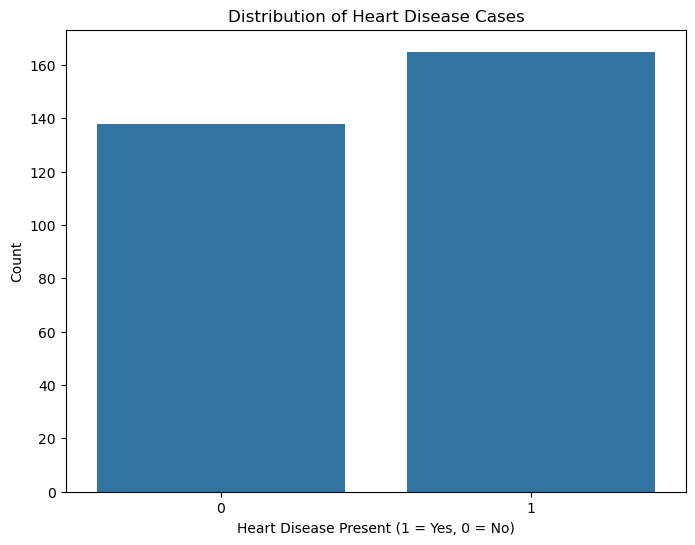

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(data=heart_dataset, x='target')  # Replace 'target' with your actual target column name
plt.title('Distribution of Heart Disease Cases')
plt.xlabel('Heart Disease Present (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

In [23]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [25]:

print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


# Correlation Heatmap Analysis

In [8]:
# Correlation Heatmap Analysis

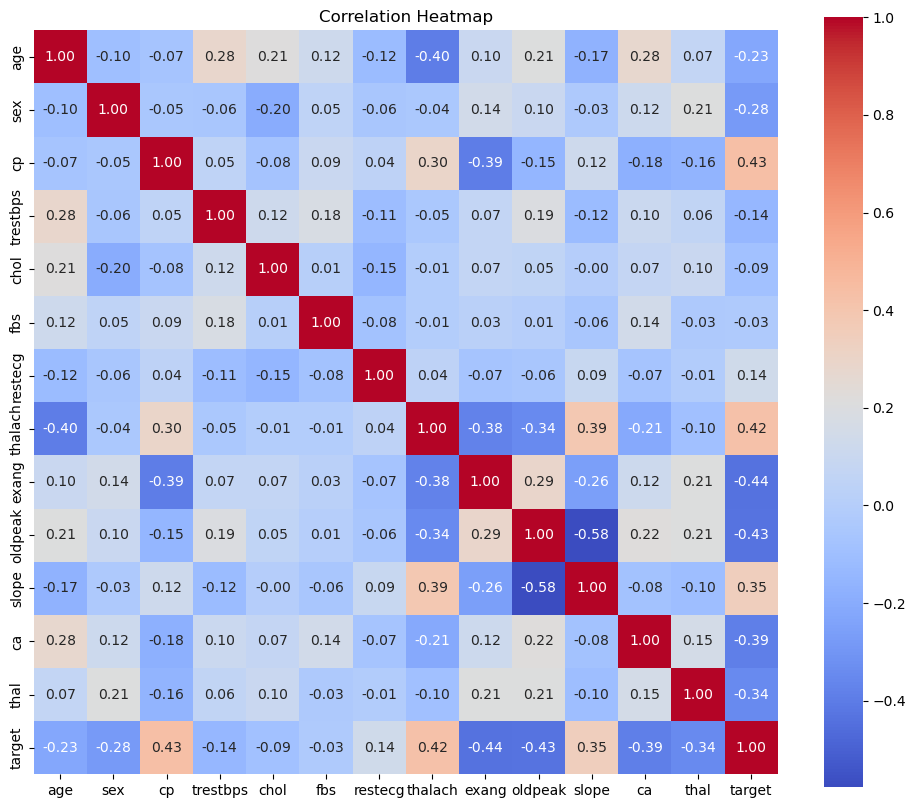

In [7]:
plt.figure(figsize=(12, 10))
correlation_matrix = heart_dataset.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


# Catplot to visualize multiple categorical variables

Helps for effective exploratory data analysis, model interpretation, performance assessment, and validation of assumptions

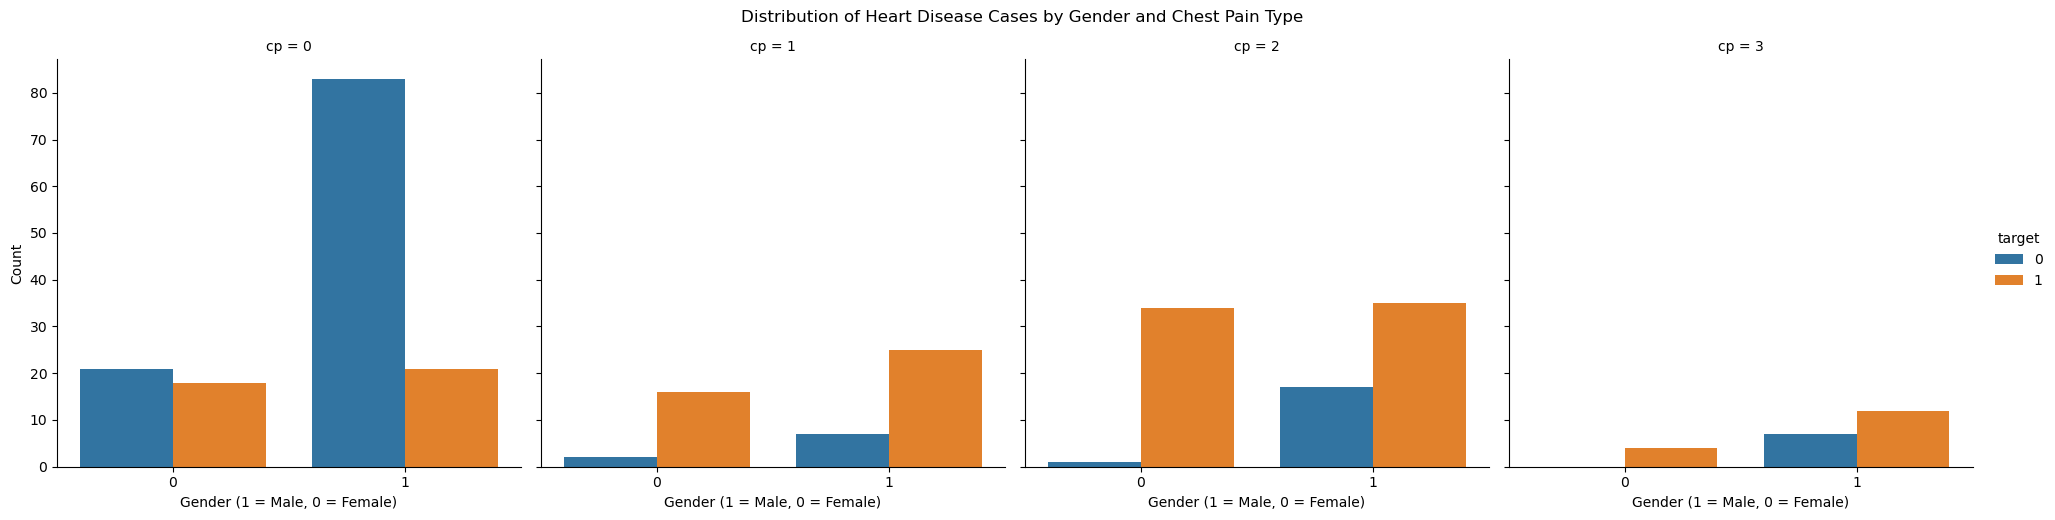

In [10]:
g = sns.catplot(data=heart_dataset, x='sex', hue='target', kind='count', col='cp')  # Replace 'cp' with another categorical variable
g.fig.suptitle('Distribution of Heart Disease Cases by Gender and Chest Pain Type', y=1.03)
g.set_axis_labels('Gender (1 = Male, 0 = Female)', 'Count')
plt.show()


# Training and Testing Split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3, stratify = Y)

# Shape Overview

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


# Logistic Regression for Heart Disease Prediction

model = LogisticRegression()

In [91]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 
model = LogisticRegression(max_iter=500) 
model.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=500)

# Evaluating Logistic Regression on Training Data

In [37]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

#  Evaluating Model Performance

In [39]:

print("Accuracy on Training Data: ", training_data_accuracy)

Accuracy on Training Data:  0.8636363636363636


 # Accuracy on Test Data with Logistic Regression

In [41]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

# Accuracy of Logistic Regression on Test Data"

In [119]:
print("Accuracy on Test Data: ", test_data_accuracy)

Accuracy on Test Data:  0.8032786885245902


# Evaluating Heart Health Based on Input Values

In [59]:
nput_values = (70, 1, 2, 160, 269, 0, 1, 112, 1, 2.9, 1, 1, 3)
input_values_as_numpy_array = np.asarray(input_values)
input_values_reshaped = input_values_as_numpy_array.reshape(1, -1)
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
                 'exang', 'oldpeak', 'slope', 'ca', 'thal']
input_values_df = pd.DataFrame(input_values_reshaped, columns=feature_names)
prediction = model.predict(input_values_df)
if prediction[0] == 0:
    print("This Person's Heart is Good.")
else:
    print("This Person's Heart is in Disease.")

This Person's Heart is in Disease.


# ROC Curve (Receiver Operating Characteristics )

The ROC curve is an essential tool for evaluating and 
interpreting the performance of logistic regression models 
in binary classification tasks

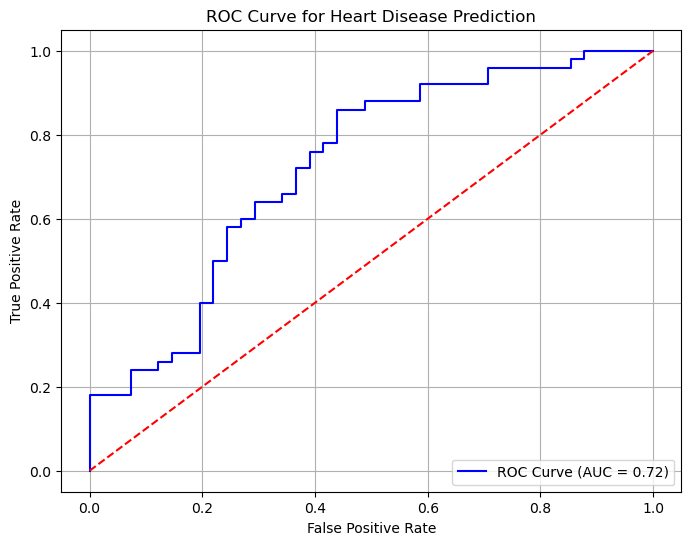

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.title('ROC Curve for Heart Disease Prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


#  Importing Pickle

In [47]:

import pickle

In [49]:

filename = "heart_disease_model.sav"
pickle.dump(model, open(filename, "wb"))